In [1]:
import sklearn
import numpy as np
import sklearn.datasets
import sklearn.neighbors
import matplotlib.pyplot as plt

In [2]:
class CustomKNeighborsRegressor:
    def __init__(self, nn, p=2) -> None:
        self.nn = nn
        self.p = p

    def fit(self, X, y):
        self.X, self.y = X, y
        return self

    def predict(self, X):
        nn = self.nn
        p = self.p
        distances = np.abs(self.X - X[:, None])
        distances = np.power(distances.sum(-1), 1/p)
        top_k = distances.argsort(-1)[:, :nn]
        y_pred = self.y[top_k].mean(-1)
        return y_pred

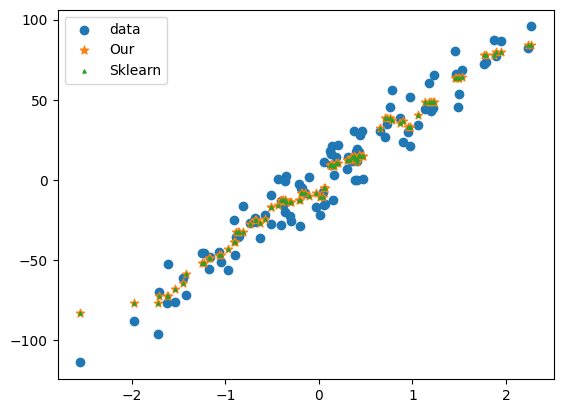

In [3]:
X, y = sklearn.datasets.make_regression(n_samples=100,n_features=1, noise=10, random_state=0)
nn = 6
p = 4
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=nn,p=p).fit(X, y)
custom = CustomKNeighborsRegressor(nn,p=p).fit(X, y)

plt.scatter(X, y, label="data")
plt.scatter(X, custom.predict(X), label="Our",marker="*")
plt.scatter(X, model.predict(X), label="Sklearn", marker="^", s=5)
plt.legend();